# Realce y Restauración de Imágenes

## Objetivos de aprendizaje
- Aplicar técnicas de mejora y restauración de imágenes digitales
- Utilizar operaciones matriciales y filtros en OpenCV
- Comprender fundamentos matemáticos de histogramas y filtrado
- Preparar imágenes para tareas avanzadas de análisis visual

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown

## Visualización de canales RGB
Una imagen en color puede verse como tres matrices en escala de grises (R,G,B)

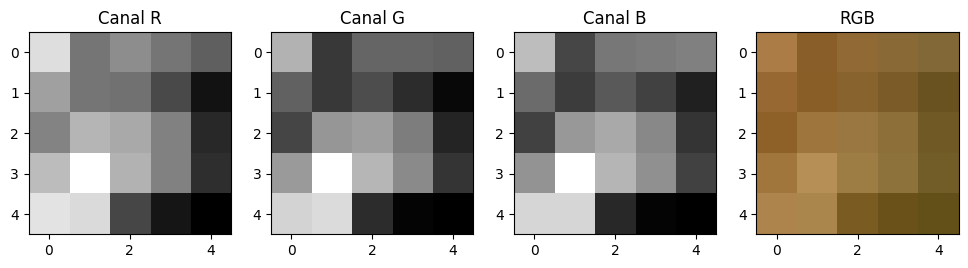

In [2]:
# Cargar imagen en color (OpenCV usa BGR)
img_bgr = cv2.imread("imagenes/frutas.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Seleccionar un patch pequeño (5x5 píxeles)
patch = img_rgb[0:5, 0:5, :]

# Separar los canales
R = patch[:,:,0]
G = patch[:,:,1]
B = patch[:,:,2]

# Visualización
plt.figure(figsize=(12,4))
plt.subplot(141)
plt.imshow(R, cmap='gray')
plt.title('Canal R')
plt.subplot(142)
plt.imshow(G, cmap='gray')
plt.title('Canal G')
plt.subplot(143)
plt.imshow(B, cmap='gray')
plt.title('Canal B')
plt.subplot(144)
plt.imshow(patch)
plt.title('RGB')
plt.show()

## Histograma y Ecualización
El histograma muestra la distribución de intensidades en la imagen

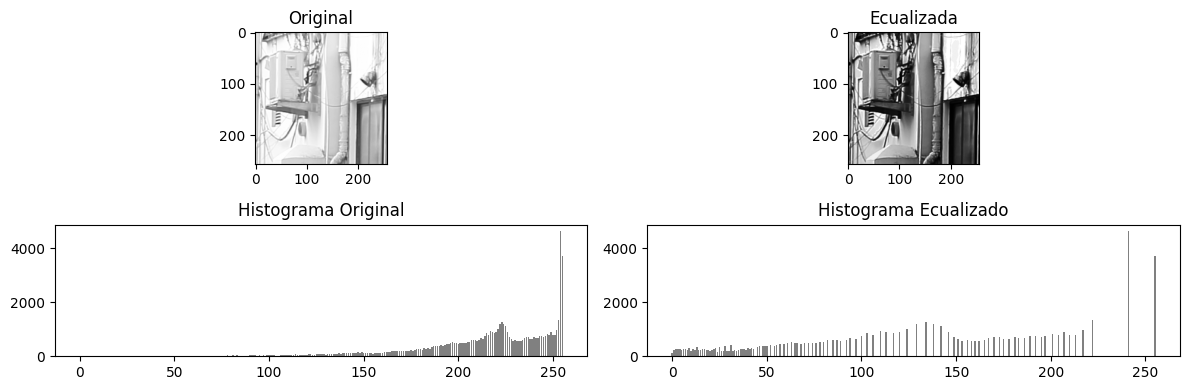

In [3]:
# Cargar imagen en escala de grises
img = cv2.imread("imagenes/DPP0357.TIF", cv2.IMREAD_GRAYSCALE)
crop = img[:256, :256]

# Calcular histograma
hist = cv2.calcHist([crop], [0], None, [256], [0,256])

# Ecualización
eq = cv2.equalizeHist(crop)
hist_eq = cv2.calcHist([eq], [0], None, [256], [0,256])

# Visualización
plt.figure(figsize=(12,4))
plt.subplot(221)
plt.imshow(crop, cmap='gray')
plt.title('Original')
plt.subplot(222)
plt.imshow(eq, cmap='gray')
plt.title('Ecualizada')
plt.subplot(223)
plt.bar(range(256), hist.ravel(), color='gray')
plt.title('Histograma Original')
plt.subplot(224)
plt.bar(range(256), hist_eq.ravel(), color='gray')
plt.title('Histograma Ecualizado')
plt.tight_layout()
plt.show()

## Filtros Espaciales
Comparación entre filtros de suavizado

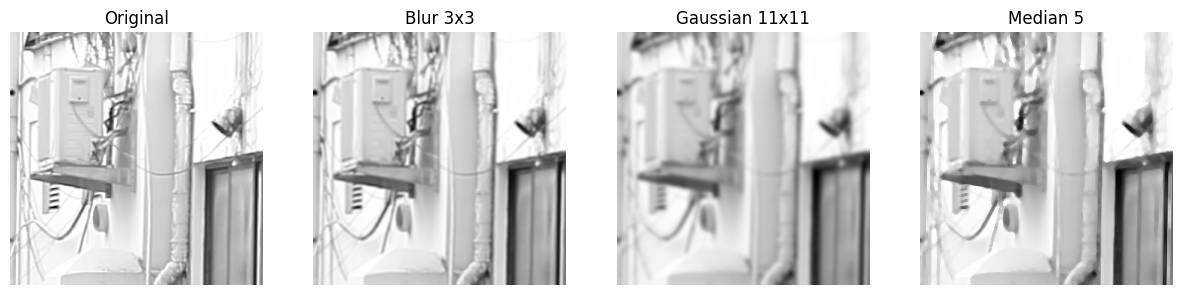

In [4]:
# Aplicar filtros
blur3 = cv2.blur(crop, (3,3))
gauss11 = cv2.GaussianBlur(crop, (11,11), 0)
median5 = cv2.medianBlur(crop, 5)

# Visualización
titles = ['Original', 'Blur 3x3', 'Gaussian 11x11', 'Median 5']
images = [crop, blur3, gauss11, median5]

plt.figure(figsize=(15,4))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1,4,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.show()